In [52]:
import os
import pandas as pd

# Define the source RAW directory
raw_dir = r"C:\Users\SujithaaR\Documents\FinalProject -DWH and DS\DWH\RAW"  # Path to your Raw folder

# Function to load CSV files into DataFrames
def load_csv(file_name):
    file_path = os.path.join(raw_dir, file_name)
    return pd.read_csv(file_path)

# Load data from RAW CSV files into individual DataFrames
df_employees = load_csv('employees.csv')
df_courses = load_csv('courses.csv')
df_enrollments = load_csv('enrollment.csv')
df_quiz_results = load_csv('quiz_results.csv')
df_feedback = load_csv('feedback.csv')
df_comments = load_csv('comments.csv')
df_engagement = load_csv('engagement.csv')  # Load the engagement data

# Print DataFrames to verify loading
print("Employees DataFrame:\n", df_employees.head(), "\n")
print("Courses DataFrame:\n", df_courses.head(), "\n")
print("Enrollments DataFrame:\n", df_enrollments.head(), "\n")
print("Quiz Results DataFrame:\n", df_quiz_results.head(), "\n")
print("Feedback DataFrame:\n", df_feedback.head(), "\n")
print("Comments DataFrame:\n", df_comments.head(), "\n")
print("Engagement DataFrame:\n", df_engagement.head(), "\n")



Employees DataFrame:
    employee_id         username    password                        email  \
0            1              ywu  4N5+WJQz+t  samanthaperkins@example.net   
1            2       jennifer27  $6lGw49FVq           wevans@example.net   
2            3         vedwards  r2Al7Ob1(&        matthew60@example.net   
3            4  gonzalessabrina  U(5L0CfZ0*        melissa00@example.net   
4            5        jessica89  +s3KPv#Edz          tonya60@example.org   

   isAdmin            department                       team  timeSpent  gender  
0     True       Data Management        Infrastructure Team      86049    Male  
1     True  Software Development     Technical Support Team      56812  Female  
2    False        Cloud Services  User Experience (UX) Team      79179    Male  
3     True            IT Support                DevOps Team      63847    Male  
4    False  Software Development  User Experience (UX) Team      10197    Male   

Courses DataFrame:
    course_id 

HANDLING DATAQUALITY 

In [53]:
display(df_employees.info())
display(df_employees.shape)
display(df_employees.columns)
display(df_employees.dtypes)

# Check for missing values
missing_values = df_employees.isnull().sum()
print("Missing values in employee data:\n", missing_values[missing_values > 0])

# Check data types
data_types = df_employees.dtypes
print("Data types in employee data:\n", data_types)

# Check for duplicates
duplicate_count = df_employees.duplicated().sum()
print("Number of duplicate records in employee data:", duplicate_count)

# Remove duplicate records
df_employees.drop_duplicates(inplace=True)


# Check unique values in categorical columns
unique_genders = df_employees['gender'].unique()
print("Unique values in gender column:\n", unique_genders)

unique_departments = df_employees['department'].unique()
print("Unique values in department column:\n", unique_departments)

unique_teams = df_employees['team'].unique()
print("Unique values in team column:\n", unique_teams)

# Check if employee_id is unique
if df_employees['employee_id'].is_unique:
    print("employee_id is unique.")
else:
    print("employee_id is not unique.")


# Fill missing values in the 'department' column with the mode
df_employees['department'] = df_employees['department'].fillna(df_employees['department'].mode()[0])


# Drop rows where 'employee_id' or 'username' are missing since they are crucial
df_employees.dropna(subset=['employee_id', 'username'], inplace=True)


# Ensure employee_id is treated as a string
df_employees['employee_id'] = df_employees['employee_id'].astype(str)

# If timeSpent is not numeric, convert it
df_employees['timeSpent'] = pd.to_numeric(df_employees['timeSpent'], errors='coerce')

# Drop the 'password' column from the employees DataFrame
df_employees.drop(columns=['password'], inplace=True)

display(df_employees.dtypes)
display(df_employees.info())
display(df_employees.shape)
display(df_employees.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  300 non-null    int64 
 1   username     300 non-null    object
 2   password     300 non-null    object
 3   email        300 non-null    object
 4   isAdmin      300 non-null    bool  
 5   department   300 non-null    object
 6   team         300 non-null    object
 7   timeSpent    300 non-null    int64 
 8   gender       300 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 19.2+ KB


None

(300, 9)

Index(['employee_id', 'username', 'password', 'email', 'isAdmin', 'department',
       'team', 'timeSpent', 'gender'],
      dtype='object')

employee_id     int64
username       object
password       object
email          object
isAdmin          bool
department     object
team           object
timeSpent       int64
gender         object
dtype: object

Missing values in employee data:
 Series([], dtype: int64)
Data types in employee data:
 employee_id     int64
username       object
password       object
email          object
isAdmin          bool
department     object
team           object
timeSpent       int64
gender         object
dtype: object
Number of duplicate records in employee data: 0
Unique values in gender column:
 ['Male' 'Female']
Unique values in department column:
 ['Data Management' 'Software Development' 'Cloud Services' 'IT Support'
 'Cybersecurity' 'Network Administration']
Unique values in team column:
 ['Infrastructure Team' 'Technical Support Team'
 'User Experience (UX) Team' 'DevOps Team' 'Quality Assurance (QA) Team'
 'Data Analytics Team']
employee_id is unique.


employee_id    object
username       object
email          object
isAdmin          bool
department     object
team           object
timeSpent       int64
gender         object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  300 non-null    object
 1   username     300 non-null    object
 2   email        300 non-null    object
 3   isAdmin      300 non-null    bool  
 4   department   300 non-null    object
 5   team         300 non-null    object
 6   timeSpent    300 non-null    int64 
 7   gender       300 non-null    object
dtypes: bool(1), int64(1), object(6)
memory usage: 16.8+ KB


None

(300, 8)

Index(['employee_id', 'username', 'email', 'isAdmin', 'department', 'team',
       'timeSpent', 'gender'],
      dtype='object')

In [54]:
# Display the initial information about the Enrollments DataFrame
display(df_enrollments.info())
display(df_enrollments.shape)
display(df_enrollments.columns)
display(df_enrollments.dtypes)

# Check for missing values
missing_values_enrollment = df_enrollments.isnull().sum()
print("Missing values in enrollment data:\n", missing_values_enrollment[missing_values_enrollment > 0])

# Check data types
data_types_enrollment = df_enrollments.dtypes
print("Data types in enrollment data:\n", data_types_enrollment)

# Check for duplicates
duplicate_count_enrollment = df_enrollments.duplicated().sum()
print("Number of duplicate records in enrollment data:", duplicate_count_enrollment)

# Remove duplicate records
df_enrollments.drop_duplicates(inplace=True)

# Check unique values in boolean columns
unique_quiz_taken = df_enrollments['isQuizTaken'].unique()
print("Unique values in isQuizTaken column (True/False):\n", unique_quiz_taken)

unique_participated = df_enrollments['isParticipated'].unique()
print("Unique values in isParticipated column (True/False):\n", unique_participated)

unique_feedback = df_enrollments['isFeedback'].unique()
print("Unique values in isFeedback column (True/False):\n", unique_feedback)

# Count of True and False in each column
quiz_taken_count = df_enrollments['isQuizTaken'].value_counts()
participated_count = df_enrollments['isParticipated'].value_counts()
feedback_count = df_enrollments['isFeedback'].value_counts()

print("\nCount of True/False in isQuizTaken:\n", quiz_taken_count)
print("Count of True/False in isParticipated:\n", participated_count)
print("Count of True/False in isFeedback:\n", feedback_count)

# Ensure enrollmentId is treated as a string
df_enrollments['enrollmentId'] = df_enrollments['enrollmentId'].astype(str)

# Ensure userId is treated as a string
df_enrollments['userId'] = df_enrollments['userId'].astype(str)

# Ensure courseId is treated as a string
df_enrollments['courseId'] = df_enrollments['courseId'].astype(str)



# Display the data types and the structure after cleaning
display(df_enrollments.dtypes)
display(df_enrollments.info())
display(df_enrollments.shape)
display(df_enrollments.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   enrollmentId    5000 non-null   object
 1   userId          5000 non-null   int64 
 2   courseId        5000 non-null   int64 
 3   enrolledAt      5000 non-null   object
 4   progress        5000 non-null   int64 
 5   completed       5000 non-null   bool  
 6   totalCount      5000 non-null   int64 
 7   completedCount  5000 non-null   int64 
 8   isQuizTaken     5000 non-null   bool  
 9   isParticipated  5000 non-null   bool  
 10  isFeedback      5000 non-null   bool  
dtypes: bool(4), int64(5), object(2)
memory usage: 293.1+ KB


None

(5000, 11)

Index(['enrollmentId', 'userId', 'courseId', 'enrolledAt', 'progress',
       'completed', 'totalCount', 'completedCount', 'isQuizTaken',
       'isParticipated', 'isFeedback'],
      dtype='object')

enrollmentId      object
userId             int64
courseId           int64
enrolledAt        object
progress           int64
completed           bool
totalCount         int64
completedCount     int64
isQuizTaken         bool
isParticipated      bool
isFeedback          bool
dtype: object

Missing values in enrollment data:
 Series([], dtype: int64)
Data types in enrollment data:
 enrollmentId      object
userId             int64
courseId           int64
enrolledAt        object
progress           int64
completed           bool
totalCount         int64
completedCount     int64
isQuizTaken         bool
isParticipated      bool
isFeedback          bool
dtype: object
Number of duplicate records in enrollment data: 0
Unique values in isQuizTaken column (True/False):
 [False  True]
Unique values in isParticipated column (True/False):
 [ True False]
Unique values in isFeedback column (True/False):
 [ True False]

Count of True/False in isQuizTaken:
 isQuizTaken
False    2507
True     2493
Name: count, dtype: int64
Count of True/False in isParticipated:
 isParticipated
False    2565
True     2435
Name: count, dtype: int64
Count of True/False in isFeedback:
 isFeedback
False    2512
True     2488
Name: count, dtype: int64


enrollmentId      object
userId            object
courseId          object
enrolledAt        object
progress           int64
completed           bool
totalCount         int64
completedCount     int64
isQuizTaken         bool
isParticipated      bool
isFeedback          bool
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   enrollmentId    5000 non-null   object
 1   userId          5000 non-null   object
 2   courseId        5000 non-null   object
 3   enrolledAt      5000 non-null   object
 4   progress        5000 non-null   int64 
 5   completed       5000 non-null   bool  
 6   totalCount      5000 non-null   int64 
 7   completedCount  5000 non-null   int64 
 8   isQuizTaken     5000 non-null   bool  
 9   isParticipated  5000 non-null   bool  
 10  isFeedback      5000 non-null   bool  
dtypes: bool(4), int64(3), object(4)
memory usage: 293.1+ KB


None

(5000, 11)

Index(['enrollmentId', 'userId', 'courseId', 'enrolledAt', 'progress',
       'completed', 'totalCount', 'completedCount', 'isQuizTaken',
       'isParticipated', 'isFeedback'],
      dtype='object')

In [55]:
df_enrollments.head()

,enrollmentId,userId,courseId,enrolledAt,progress,completed,totalCount,completedCount,isQuizTaken,isParticipated,isFeedback
0,rQS0kpxX,158,16,2024-10-07T15:07:42.738926,71,False,9,8,False,True,True
1,3AStlgcU,130,13,2024-10-07T15:07:42.738926,76,False,9,7,True,True,False
2,E2UsVdTq,172,18,2024-10-07T15:07:42.739930,14,False,10,8,True,True,False
3,fh9DWDHa,271,13,2024-10-07T15:07:42.739930,60,False,11,10,False,True,True
4,tmdGzFZb,246,20,2024-10-07T15:07:42.739930,30,False,17,4,True,True,False


CHANGING THE DATATYPES FOR IDs

In [56]:
# Convert userId, courseId, and enrollmentId in relevant DataFrames to string
df_quiz_results['userId'] = df_quiz_results['userId'].astype(str)
df_quiz_results['courseId'] = df_quiz_results['courseId'].astype(str)
df_quiz_results['enrollmentId'] = df_quiz_results['enrollmentId'].astype(str)

df_feedback['userId'] = df_feedback['userId'].astype(str)
df_feedback['courseId'] = df_feedback['courseId'].astype(str)
df_feedback['enrollmentId'] = df_feedback['enrollmentId'].astype(str)

df_comments['userId'] = df_comments['userId'].astype(str)
df_comments['courseId'] = df_comments['courseId'].astype(str)
df_comments['enrollmentId'] = df_comments['enrollmentId'].astype(str)

df_engagement['userId'] = df_engagement['userId'].astype(str)
df_engagement['courseId'] = df_engagement['courseId'].astype(str)
df_engagement['enrollmentId'] = df_engagement['enrollmentId'].astype(str)


HYPOTHESIS

In [57]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Hypothesis 1: Employees who participate in more courses have higher engagement levels.

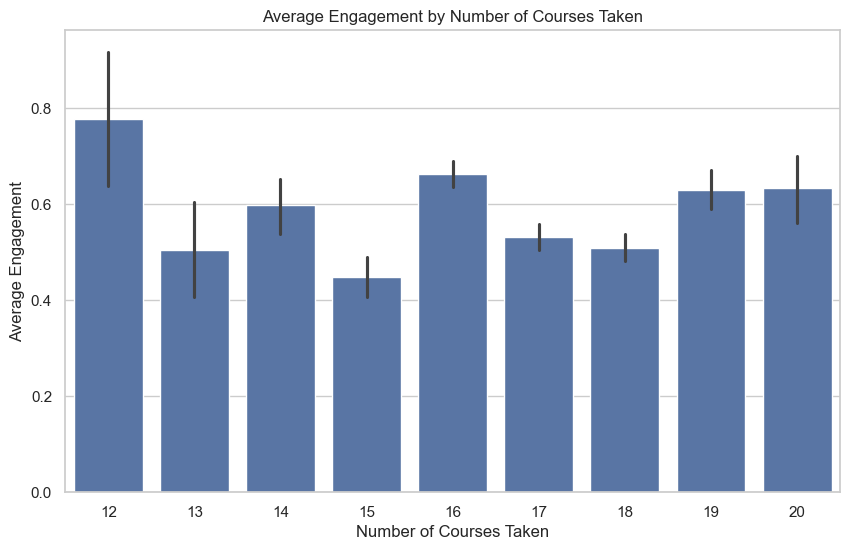

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of courses per user
course_count = df_enrollments.groupby('userId').size().reset_index(name='course_count')

# Assuming df_engagement has 'userId' and 'engagement' columns
engagement_count = df_engagement.merge(course_count, on='userId')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_count, x='course_count', y='engagement', estimator='mean')
plt.title('Average Engagement by Number of Courses Taken')
plt.xlabel('Number of Courses Taken')
plt.ylabel('Average Engagement')
plt.show()




Hypothesis 2: Feedback Given and Engagement

C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_11624\340467957.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=feedback_engagement, x='isFeedback', hue='engagement', palette=['#FF9999', '#66B3FF', '#99FF99'])  # Custom colors


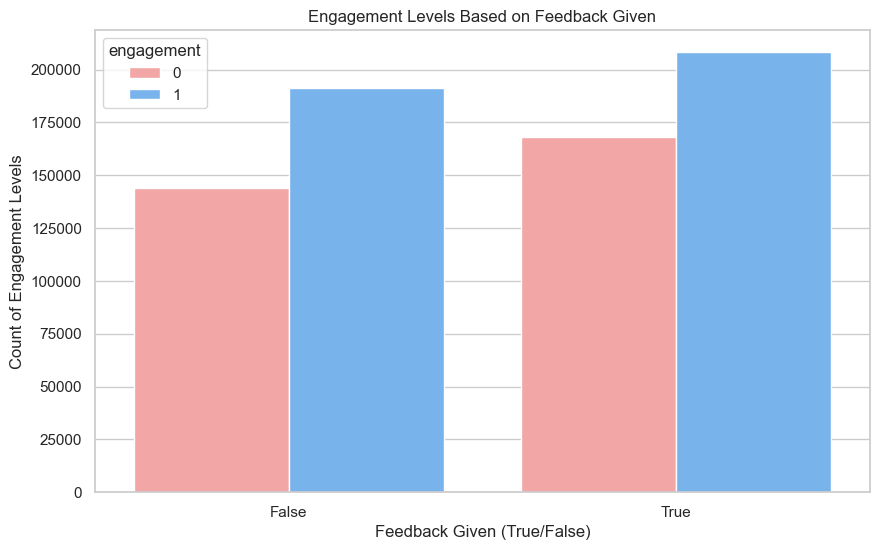

In [59]:
feedback_engagement = df_feedback.merge(
    df_enrollments[['userId', 'isFeedback']],
    on='userId',
    how='left'  # Keep all feedback records
).merge(
    df_engagement[['userId', 'engagement']],
    on='userId',
    how='left'  # Keep all feedback records
)

plt.figure(figsize=(10, 6))
sns.countplot(data=feedback_engagement, x='isFeedback', hue='engagement', palette=['#FF9999', '#66B3FF', '#99FF99'])  # Custom colors
plt.title('Engagement Levels Based on Feedback Given')
plt.xlabel('Feedback Given (True/False)')
plt.ylabel('Count of Engagement Levels')
plt.show()





HYPOTHESIS 3: Department-wise Engagement

C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_11624\2436220172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_engagement, x='department', y='engagement', palette='Set2')


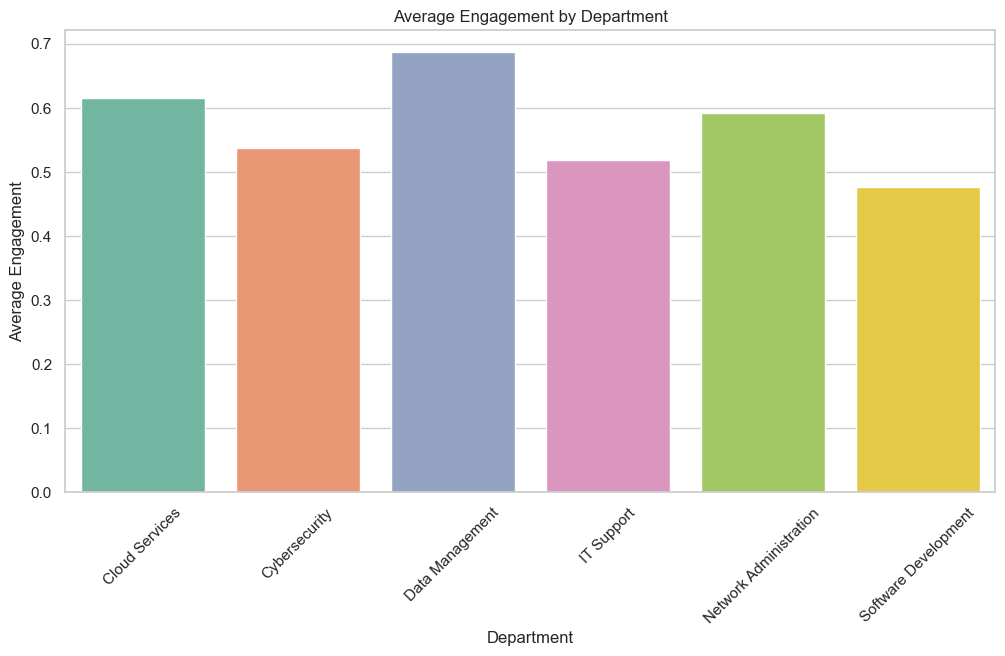

In [60]:
employee_engagement = df_employees.merge(df_engagement[['userId', 'engagement']], left_on='employee_id', right_on='userId')

plt.figure(figsize=(12, 6))
avg_engagement = employee_engagement.groupby('department')['engagement'].mean().reset_index()
sns.barplot(data=avg_engagement, x='department', y='engagement', palette='Set2')
plt.title('Average Engagement by Department')
plt.xlabel('Department')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
plt.show()




HYPOTHESIS 4: Engagement vs. Course Completion

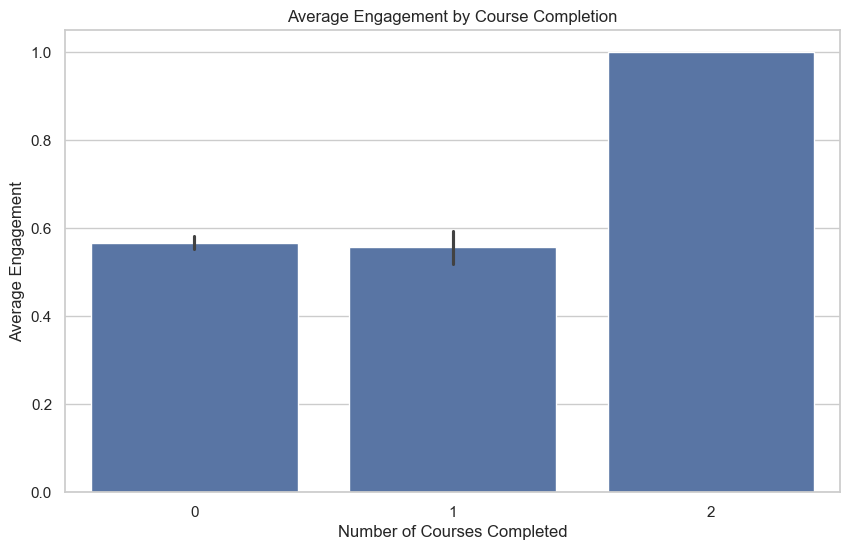

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merging enrollment and engagement data
enrollment_engagement = df_enrollments.groupby('userId').agg({'completed': 'sum'}).reset_index()
enrollment_engagement = enrollment_engagement.merge(df_engagement, on='userId')

plt.figure(figsize=(10, 6))
sns.barplot(data=enrollment_engagement, x='completed', y='engagement', estimator='mean')
plt.title('Average Engagement by Course Completion')
plt.xlabel('Number of Courses Completed')
plt.ylabel('Average Engagement')
plt.show()


HYPOTHESIS 5: Employees with higher time spent on courses have a higher likelihood of being engaged compared to those with lower time spent.

C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_11624\1684655154.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=combined, x='engagement', y='timeSpent', palette='Set2')


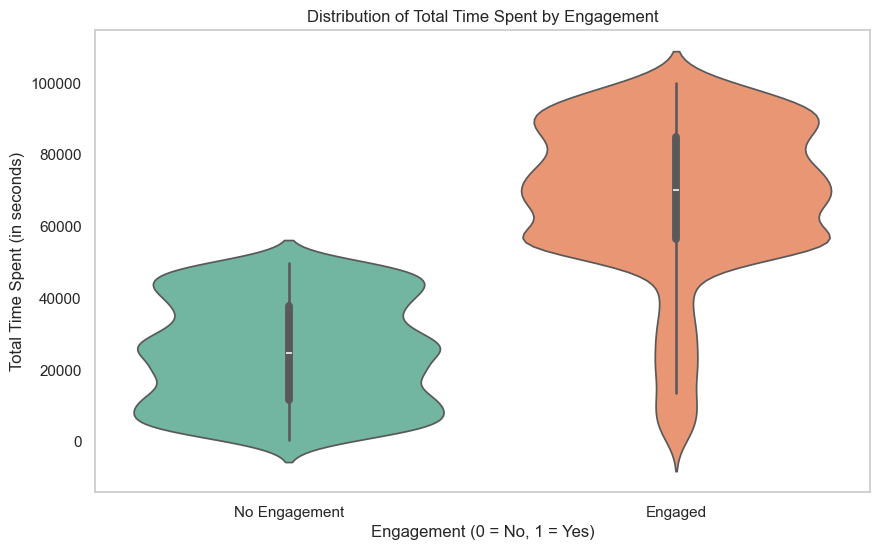

In [62]:
# Merge employee data with engagement data (assuming userId corresponds to employee_id)
df_employees['userId'] = df_employees['employee_id']  # Mapping for merging
combined = pd.merge(df_employees, df_engagement, on='userId', how='left')

# Visualization
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined, x='engagement', y='timeSpent', palette='Set2')
plt.title('Distribution of Total Time Spent by Engagement')
plt.xlabel('Engagement (0 = No, 1 = Yes)')
plt.ylabel('Total Time Spent (in seconds)')
plt.xticks(ticks=[0, 1], labels=['No Engagement', 'Engaged'])
plt.grid(axis='y')
plt.show()


HYPOTHESIS 6: Employees who leave comments about courses are more likely to be engaged than those who do not leave comments.

engagement         0     1
isParticipated            
False           1302  1263
True             864  1571


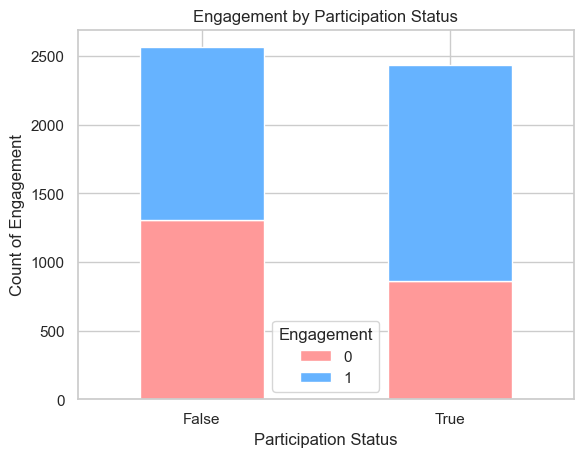

In [63]:
# Merge DataFrames
combined = pd.merge(df_enrollments, df_engagement, on=['userId', 'enrollmentId', 'courseId'])

# Count engagement by participation status
participation_engagement = combined.groupby('isParticipated')['engagement'].value_counts().unstack(fill_value=0)

print(participation_engagement)

# Visualization with custom colors
colors = ['#FF9999', '#66B3FF']  # Customize colors for engagement levels 0 and 1
participation_engagement.plot(kind='bar', stacked=True, color=colors)
plt.title('Engagement by Participation Status')
plt.xlabel('Participation Status')
plt.ylabel('Count of Engagement')
plt.xticks(rotation=0)
plt.legend(title='Engagement', labels=['0', '1'])
plt.show()


HYPOTHESIS 7: Quiz Taken vs Engagement

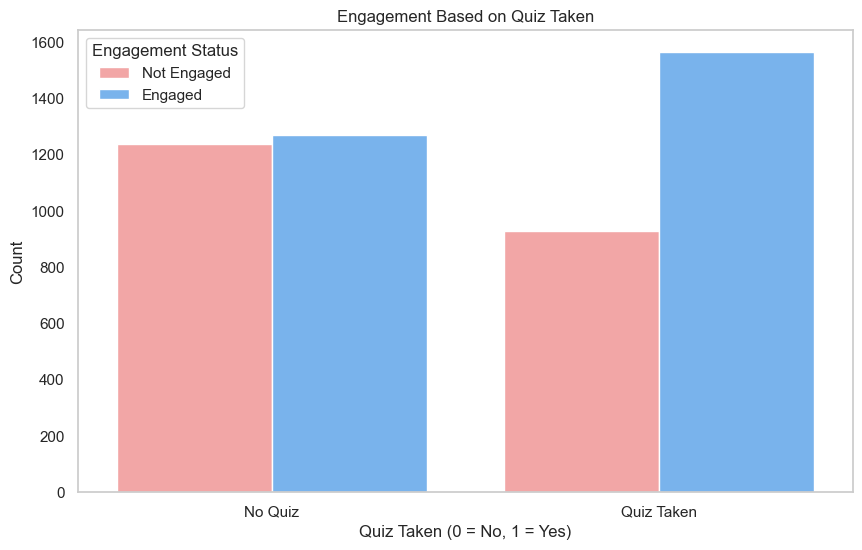

In [64]:
# Merge the DataFrames on userId and enrollmentId
combined = pd.merge(df_enrollments, df_engagement, on=['userId', 'enrollmentId'])

# Create a new column for engagement status
combined['engaged'] = combined['engagement'].apply(lambda x: 'Engaged' if x == 1 else 'Not Engaged')

# Plotting the counts of engaged vs not engaged based on quiz taken
plt.figure(figsize=(10, 6))
sns.countplot(data=combined, x='isQuizTaken', hue='engaged', palette=['#FF9999', '#66B3FF'])  # Custom colors
plt.title('Engagement Based on Quiz Taken')
plt.xlabel('Quiz Taken (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Quiz', 'Quiz Taken'])
plt.legend(title='Engagement Status')
plt.grid(axis='y')
plt.show()

MERGING ALL THE TABLES

In [79]:
# Convert courseId to string if necessary
df_enrollments['courseId'] = df_enrollments['courseId'].astype(str)
df_courses['course_id'] = df_courses['course_id'].astype(str)
df_feedback['courseId'] = df_feedback['courseId'].astype(str)

# Merge with employees
merged_df = df_enrollments.merge(
    df_employees[['employee_id', 'username', 'gender', 'department', 'team']],
    left_on='userId', right_on='employee_id', how='left'
)

# Merge with courses
merged_df = merged_df.merge(
    df_courses[['course_id', 'title']],
    left_on='courseId', right_on='course_id', how='left'
)

# Merge with feedback
merged_df = merged_df.merge(
    df_feedback[['userId', 'courseId', 'enrollmentId', 'overallSatisfaction', 'contentQuality', 'instructorEffectiveness', 'comments']],
    on=['userId', 'courseId', 'enrollmentId'],
    how='left'
)

# Merge with engagement
merged_df = merged_df.merge(
    df_engagement[['userId', 'enrollmentId', 'courseId', 'engagement']],
    on=['userId', 'enrollmentId', 'courseId'],
    how='left'
)

# Replace NaN values with specific messages for feedback
# Replace NaN values with -1 for the feedback columns
merged_df['overallSatisfaction'] = merged_df['overallSatisfaction'].fillna(-1)
merged_df['contentQuality'] = merged_df['contentQuality'].fillna(-1)
merged_df['instructorEffectiveness'] = merged_df['instructorEffectiveness'].fillna(-1)

merged_df['overallSatisfaction'] = merged_df['overallSatisfaction'].astype(int)
merged_df['contentQuality'] = merged_df['contentQuality'].astype(int)
merged_df['instructorEffectiveness'] = merged_df['instructorEffectiveness'].astype(int)
merged_df['comments'] = merged_df['comments'].fillna('Feedback not given')

# Drop duplicate columns
merged_df.drop(columns=['userId', 'course_id'], inplace=True)

# Display final DataFrame
print("\nFinal Merged DataFrame:")
print(merged_df.head())
print("Shape of merged DataFrame:", merged_df.shape)
print("Columns in merged DataFrame:", merged_df.columns)


Final Merged DataFrame:
  enrollmentId courseId                  enrolledAt  progress  completed  \
0     rQS0kpxX       16  2024-10-07T15:07:42.738926        71      False   
1     3AStlgcU       13  2024-10-07T15:07:42.738926        76      False   
2     E2UsVdTq       18  2024-10-07T15:07:42.739930        14      False   
3     fh9DWDHa       13  2024-10-07T15:07:42.739930        60      False   
4     tmdGzFZb       20  2024-10-07T15:07:42.739930        30      False   

   totalCount  completedCount  isQuizTaken  isParticipated  isFeedback  ...  \
0           9               8        False            True        True  ...   
1           9               7         True            True       False  ...   
2          10               8         True            True       False  ...   
3          11              10        False            True        True  ...   
4          17               4         True            True       False  ...   

         username  gender              depa

In [81]:
merged_df.dtypes

enrollmentId               object
courseId                   object
enrolledAt                 object
progress                    int64
completed                    bool
totalCount                  int64
completedCount              int64
isQuizTaken                  bool
isParticipated               bool
isFeedback                   bool
employee_id                object
username                   object
gender                     object
department                 object
team                       object
title                      object
overallSatisfaction         int64
contentQuality              int64
instructorEffectiveness     int64
comments                   object
engagement                  int64
dtype: object

In [80]:
# Lists to hold numerical, categorical, and boolean columns
numerical_columns = []
categorical_columns = []

# Determine which columns are numerical, categorical, or boolean
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64', 'bool']:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

# Display the results
print("Numerical Columns:")
print(numerical_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['progress', 'completed', 'totalCount', 'completedCount', 'isQuizTaken', 'isParticipated', 'isFeedback', 'overallSatisfaction', 'contentQuality', 'instructorEffectiveness', 'engagement']

Categorical Columns:
['enrollmentId', 'courseId', 'enrolledAt', 'employee_id', 'username', 'gender', 'department', 'team', 'title', 'comments']


Correlation Matrix:
                         progress  completed  totalCount  completedCount  \
progress                 1.000000   0.161584   -0.004522        0.025583   
completed                0.161584   1.000000    0.009049        0.151100   
totalCount              -0.004522   0.009049    1.000000        0.512456   
completedCount           0.025583   0.151100    0.512456        1.000000   
isQuizTaken             -0.010072   0.006620    0.001448       -0.008687   
isParticipated          -0.010871   0.004597   -0.018478       -0.007530   
isFeedback              -0.015443  -0.035544   -0.009621       -0.018141   
overallSatisfaction     -0.019600  -0.034929   -0.011347       -0.025276   
contentQuality          -0.006087  -0.034186   -0.004112       -0.006456   
instructorEffectiveness -0.011501  -0.032223   -0.015601       -0.030070   
engagement              -0.018060   0.083313   -0.006384        0.023291   

                         isQuizTaken  isParticipated  isFeedback  \

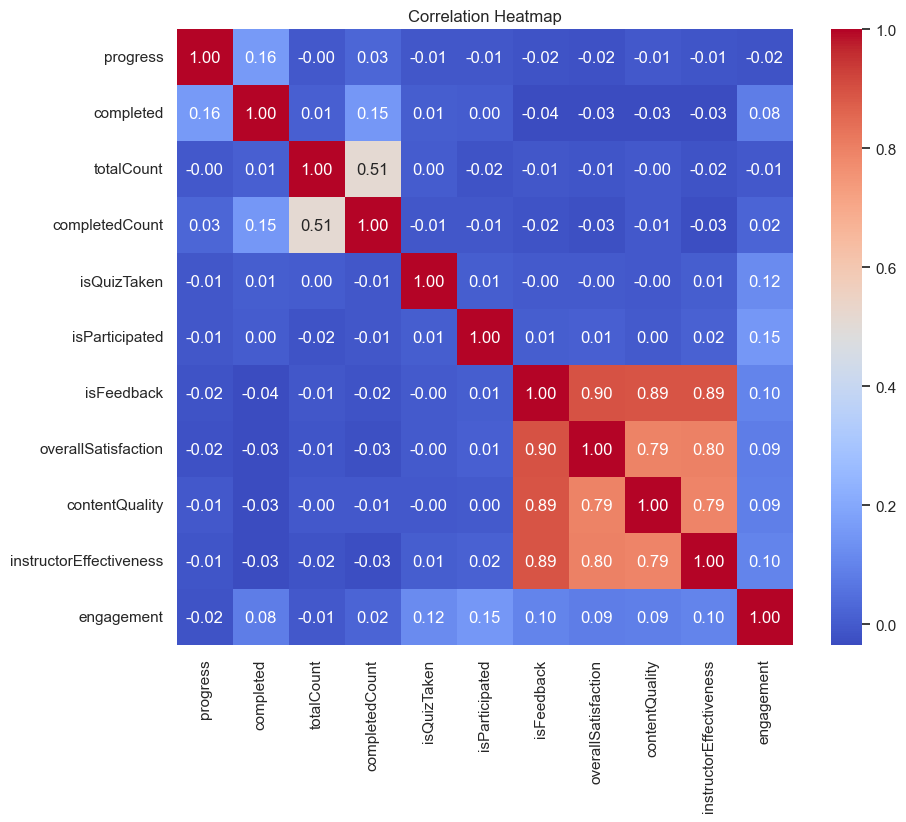

In [84]:
# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

CHECK THE DATA IS BALANCED OR NOT

Engagement Counts:
engagement
1    2834
0    2166
Name: count, dtype: int64


C:\Users\SujithaaR\AppData\Local\Temp\ipykernel_11624\1161387543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_counts.index, y=engagement_counts.values, palette='viridis')


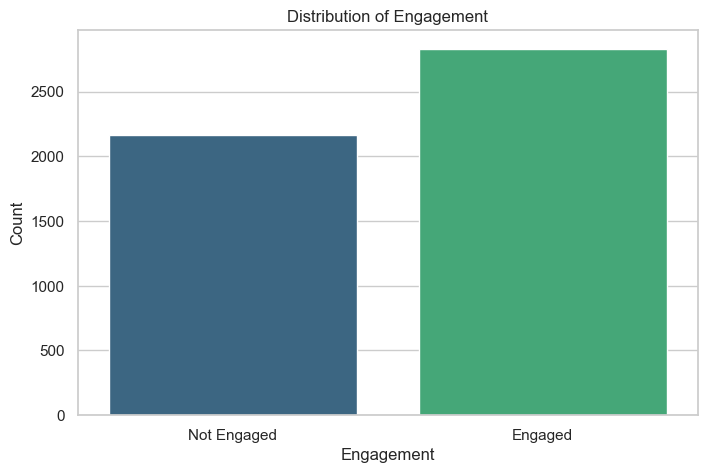

In [82]:
# Check the balance of the target variable 'engagement'
engagement_counts = merged_df['engagement'].value_counts()

# Display the counts
print("Engagement Counts:")
print(engagement_counts)

# Visualization (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=engagement_counts.index, y=engagement_counts.values, palette='viridis')
plt.title('Distribution of Engagement')
plt.xlabel('Engagement')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Engaged', 'Engaged'])
plt.show()


CONTINUOUS FEATURES AND DISCRETE FEATURES

In [83]:
# Initialize lists for continuous and discrete features
continuous_features = []
discrete_features = []

# Define continuous and discrete criteria
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:
        # Check if the feature has any decimal values (continuous)
        if merged_df[column].nunique() > 10:  # Arbitrary threshold for uniqueness
            continuous_features.append(column)
        else:  # Otherwise, consider it discrete
            discrete_features.append(column)

# Display the results
print("Continuous Features:")
print(continuous_features)
print("\nDiscrete Features:")
print(discrete_features)


Continuous Features:
['progress', 'totalCount', 'completedCount']

Discrete Features:
['overallSatisfaction', 'contentQuality', 'instructorEffectiveness', 'engagement']
